In [7]:
# svm_model.ipynb

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
sns.set(style="whitegrid")

In [22]:
# Load the dataset for the H2170 lung cancer cell line
# We call its container "df_cell", which stands for dataFrame of the cell line that holds all of the single-cell protein measurements
df_cell = pd.read_csv('/Users/22holleranm/DATA_481_766_protein_networks/shared_team_files/lung_cancer.csv', index_col=0)

# Display the first few rows
df_cell.head()

,01_cMyc_nuc_mean,01_BRD4_nuc_mean,01_CDK2_nuc_mean,02_HER2_nuc_mean,02_CyclinD1_nuc_mean,02_EGFR_nuc_mean,03_FGFR2_nuc_mean,03_CDC6_nuc_mean,03_EZH2_nuc_mean,04_cMycS62_nuc_mean,04_FOXO1_nuc_mean,04_HER2_nuc_mean,05_cMycT58_nuc_mean,05_CyclinA_nuc_mean,05_CyclinB1_nuc_mean,06_FOXO3A_nuc_mean,06_AKT_nuc_mean,06_ZEB1_nuc_mean,07_pRb_S807811_nuc_mean,07_Rb_nuc_mean,07_p21_nuc_mean,08_CDT1_nuc_mean,08_MDM2_nuc_mean,09_SKP2_nuc_mean,09_mTOR_nuc_mean,10_TGFbeta_nuc_mean,10_E2F1_nuc_mean,11_cFOS_nuc_mean,11_CDH1_nuc_mean,12_EZH2_nuc_mean,12_cPARP_nuc_mean,01_cMyc_ring_mean,01_BRD4_ring_mean,01_CDK2_ring_mean,02_HER2_ring_mean,02_CyclinD1_ring_mean,02_EGFR_ring_mean,03_FGFR2_ring_mean,03_CDC6_ring_mean,03_EZH2_ring_mean,04_cMycS62_ring_mean,04_FOXO1_ring_mean,04_HER2_ring_mean,05_cMycT58_ring_mean,05_CyclinA_ring_mean,05_CyclinB1_ring_mean,06_FOXO3A_ring_mean,06_AKT_ring_mean,06_ZEB1_ring_mean,07_pRb_S807811_ring_mean,07_Rb_ring_mean,07_p21_ring_mean,08_CDT1_ring_mean,08_MDM2_ring_mean,09_SKP2_ring_mean,09_mTOR_ring_mean,10_TGFbeta_ring_mean,10_E2F1_ring_mean,11_cFOS_ring_mean,11_CDH1_ring_mean,12_EZH2_ring_mean,12_cPARP_ring_mean
index_column,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cell_24,-0.274626,-0.632049,0.130158,0.996370,-0.217049,-0.177764,0.109605,1.356144,0.482767,-0.536020,-0.987532,-0.897249,0.243860,-0.927233,-0.002703,0.406510,-0.457381,0.887332,0.114794,-0.430899,1.254235,1.871959,0.461608,0.422949,1.406970,-0.434054,-0.922134,0.300361,0.737689,0.626121,0.519019,0.448048,0.108275,0.868095,1.319311,0.076730,-0.006708,0.263158,1.385566,0.719334,-0.402828,-1.048042,-0.925909,0.334180,-0.284215,1.325648,0.513783,-0.151589,0.874221,0.929768,0.446487,1.270743,1.188206,0.365427,1.164822,1.464958,-0.378041,-0.906202,0.209302,0.589119,0.940516,0.368686
cell_31,0.545061,0.302935,0.875525,0.416186,-0.523494,-0.444546,-0.218084,0.560125,0.388460,0.624579,-0.696834,-0.698082,0.404130,0.377436,0.506497,0.032809,-0.538555,0.346244,1.209497,0.987865,0.753873,-0.235938,-0.070285,1.566281,0.917627,-0.004364,-0.017985,0.250767,0.057809,1.478013,0.019616,0.485509,0.248573,0.915782,0.890622,-0.143222,-0.101312,0.144229,1.156873,0.543466,-0.333130,-0.913026,-0.713302,0.266901,0.122589,1.330254,0.379366,-0.188642,0.686795,0.582482,0.476434,0.979811,0.417119,0.159226,1.409255,1.360996,-0.186646,-0.669842,0.128295,0.240999,0.956225,0.188836
cell_36,0.478836,-0.622209,-0.316807,0.273643,-0.855136,-0.445459,-0.495221,0.306739,-0.401794,0.390856,-0.824935,-0.611346,-0.104029,-0.369246,-0.081758,0.202629,-0.745466,-0.057875,0.507749,0.167409,0.202370,-0.516313,-0.422799,1.228007,0.500917,0.007855,-0.462886,-0.072239,-0.370941,0.222873,-0.226078,0.010196,-0.094905,-0.103745,0.236957,-0.593180,-0.307542,-0.419718,0.570195,-0.181529,-0.053759,-0.641108,-0.577423,-0.191195,-0.458681,0.032330,-0.024514,-0.642016,-0.014706,0.181128,-0.018302,0.199695,-0.165359,-0.282927,0.601053,0.460337,0.176087,-0.256244,-0.202937,-0.290657,0.158839,-0.211352
cell_43,-0.747665,-1.171727,-0.779043,-0.258488,-1.004050,-0.582779,-0.864614,-0.471185,-0.527605,-0.821571,-0.864645,-0.990543,-0.607014,-0.717098,-0.687771,0.153157,-0.843331,-0.112361,0.669902,0.363792,-0.009721,-0.684535,-0.385856,0.154523,0.359326,-0.237356,-0.532523,-0.709584,-0.514982,-0.161593,-0.454719,-0.630292,-0.822400,-0.832541,-0.554567,-0.941967,-0.596149,-1.019525,-0.729150,-0.704892,-0.751484,-0.915185,-0.971186,-0.599293,-1.009942,-0.901189,-0.389840,-0.950625,-0.224062,-0.203456,-0.321853,-0.140230,-0.670966,-0.392751,-0.139191,-0.018206,-0.421827,-0.582895,-0.898908,-0.599372,-0.398471,-0.556434
cell_51,-0.969321,-0.830915,-0.439126,0.909262,-0.538657,1.243933,-0.292941,-0.317952,0.356104,-1.060728,-0.793165,0.505676,-0.859886,-0.976564,-0.010725,-0.142979,0.121853,1.201399,-1.370445,-1.067327,0.643206,-0.438881,1.183240,-0.800889,0.762989,-0.426352,-0.661457,0.552717,0.289812,-0.649461,0.332243,-0.781621,-0.739925,-0.295508,-0.289053,-0.793799,0.237827,-0.965990,-0.56011

In [23]:
df_cell['02_HER2_combined'] = (df_cell['02_HER2_nuc_mean'] + df_cell['02_HER2_ring_mean']) / 2

# Define cutoffs for top and bottom 10%
top_10 = df_cell['02_HER2_combined'].quantile(0.9)
bottom_10 = df_cell['02_HER2_combined'].quantile(0.1)

# Create HER2 group column
df_cell['HER2_Group_02'] = 'Middle'
df_cell.loc[df_cell['02_HER2_combined'] >= top_10, 'HER2_Group_02'] = 'High HER2'
df_cell.loc[df_cell['02_HER2_combined'] <= bottom_10, 'HER2_Group_02'] = 'Low HER2'

# encoding target labels
label_map = {
    'Low HER2': 0,
    'Middle': 1,
    'High HER2': 2
}

# Apply mapping
df_cell['HER2_Group_02_encoded'] = df_cell['HER2_Group_02'].map(label_map)


df_cell.head()

,01_cMyc_nuc_mean,01_BRD4_nuc_mean,01_CDK2_nuc_mean,02_HER2_nuc_mean,02_CyclinD1_nuc_mean,02_EGFR_nuc_mean,03_FGFR2_nuc_mean,03_CDC6_nuc_mean,03_EZH2_nuc_mean,04_cMycS62_nuc_mean,04_FOXO1_nuc_mean,04_HER2_nuc_mean,05_cMycT58_nuc_mean,05_CyclinA_nuc_mean,05_CyclinB1_nuc_mean,06_FOXO3A_nuc_mean,06_AKT_nuc_mean,06_ZEB1_nuc_mean,07_pRb_S807811_nuc_mean,07_Rb_nuc_mean,07_p21_nuc_mean,08_CDT1_nuc_mean,08_MDM2_nuc_mean,09_SKP2_nuc_mean,09_mTOR_nuc_mean,10_TGFbeta_nuc_mean,10_E2F1_nuc_mean,11_cFOS_nuc_mean,11_CDH1_nuc_mean,12_EZH2_nuc_mean,12_cPARP_nuc_mean,01_cMyc_ring_mean,01_BRD4_ring_mean,01_CDK2_ring_mean,02_HER2_ring_mean,02_CyclinD1_ring_mean,02_EGFR_ring_mean,03_FGFR2_ring_mean,03_CDC6_ring_mean,03_EZH2_ring_mean,04_cMycS62_ring_mean,04_FOXO1_ring_mean,04_HER2_ring_mean,05_cMycT58_ring_mean,05_CyclinA_ring_mean,05_CyclinB1_ring_mean,06_FOXO3A_ring_mean,06_AKT_ring_mean,06_ZEB1_ring_mean,07_pRb_S807811_ring_mean,07_Rb_ring_mean,07_p21_ring_mean,08_CDT1_ring_mean,08_MDM2_ring_mean,09_SKP2_ring_mean,09_mTOR_ring_mean,10_TGFbeta_ring_mean,10_E2F1_ring_mean,11_cFOS_ring_mean,11_CDH1_ring_mean,12_EZH2_ring_mean,12_cPARP_ring_mean,02_HER2_combined,HER2_Group_02,HER2_Group_02_encoded
index_column,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cell_24,-0.274626,-0.632049,0.130158,0.996370,-0.217049,-0.177764,0.109605,1.356144,0.482767,-0.536020,-0.987532,-0.897249,0.243860,-0.927233,-0.002703,0.406510,-0.457381,0.887332,0.114794,-0.430899,1.254235,1.871959,0.461608,0.422949,1.406970,-0.434054,-0.922134,0.300361,0.737689,0.626121,0.519019,0.448048,0.108275,0.868095,1.319311,0.076730,-0.006708,0.263158,1.385566,0.719334,-0.402828,-1.048042,-0.925909,0.334180,-0.284215,1.325648,0.513783,-0.151589,0.874221,0.929768,0.446487,1.270743,1.188206,0.365427,1.164822,1.464958,-0.378041,-0.906202,0.209302,0.589119,0.940516,0.368686,1.157840,High HER2,2
cell_31,0.545061,0.302935,0.875525,0.416186,-0.523494,-0.444546,-0.218084,0.560125,0.388460,0.624579,-0.696834,-0.698082,0.404130,0.377436,0.506497,0.032809,-0.538555,0.346244,1.209497,0.987865,0.753873,-0.235938,-0.070285,1.566281,0.917627,-0.004364,-0.017985,0.250767,0.057809,1.478013,0.019616,0.485509,0.248573,0.915782,0.890622,-0.143222,-0.101312,0.144229,1.156873,0.543466,-0.333130,-0.913026,-0.713302,0.266901,0.122589,1.330254,0.379366,-0.188642,0.686795,0.582482,0.476434,0.979811,0.417119,0.159226,1.409255,1.360996,-0.186646,-0.669842,0.128295,0.240999,0.956225,0.188836,0.653404,High HER2,2
cell_36,0.478836,-0.622209,-0.316807,0.273643,-0.855136,-0.445459,-0.495221,0.306739,-0.401794,0.390856,-0.824935,-0.611346,-0.104029,-0.369246,-0.081758,0.202629,-0.745466,-0.057875,0.507749,0.167409,0.202370,-0.516313,-0.422799,1.228007,0.500917,0.007855,-0.462886,-0.072239,-0.370941,0.222873,-0.226078,0.010196,-0.094905,-0.103745,0.236957,-0.593180,-0.307542,-0.419718,0.570195,-0.181529,-0.053759,-0.641108,-0.577423,-0.191195,-0.458681,0.032330,-0.024514,-0.642016,-0.014706,0.181128,-0.018302,0.199695,-0.165359,-0.282927,0.601053,0.460337,0.176087,-0.256244,-0.202937,-0.290657,0.158839,-0.211352,0.255300,Middle,1
cell_43,-0.747665,-1.171727,-0.779043,-0.258488,-1.004050,-0.582779,-0.864614,-0.471185,-0.527605,-0.821571,-0.864645,-0.990543,-0.607014,-0.717098,-0.687771,0.153157,-0.843331,-0.112361,0.669902,0.363792,-0.009721,-0.684535,-0.385856,0.154523,0.359326,-0.237356,-0.532523,-0.709584,-0.514982,-0.161593,-0.454719,-0.630292,-0.822400,-0.832541,-0.554567,-0.941967,-0.596149,-1.019525,-0.729150,-0.704892,-0.751484,-0.915185,-0.971186,-0.599293,-1.009942,-0.901189,-0.389840,-0.950625,-0.224062,-0.203456,-0.321853,-0.140230,-0.670966,-0.392751,-0.139191,-0.018206,-0.421827,-0.582895,-0.898908,-0.599372,-0.398471,-0.556434,-0.406528,Middle,1
cell_51,-0.969321,-0.830915,-0.439126,0.909262,-0.538657,1.243933,-0.292941,-0.317952,0.356104,-1.060728,-0.793165,0.505676,-0.859886,-0.976564,-0.010725,-0.142979,0.121853,1.201399,-1.370445,-1.067327,0.643206,-0.438881,1.183240,-0.800889,0.762989

In [26]:
# Drop HER2 measurement columns (we don't want to train on what we used to label the groups)
X = df_cell.drop(columns=['HER2_Group_02', 'HER2_Group_02_encoded', '02_HER2_combined', '02_HER2_nuc_mean', '02_HER2_ring_mean', '04_HER2_nuc_mean', '04_HER2_ring_mean'])
y = df_cell['HER2_Group_02_encoded']

# standardize values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [28]:
# Train an SVM model (one-vs-rest is default for multi-class)
svm_model = SVC(kernel='rbf', C=1, gamma='scale', decision_function_shape='ovr')
svm_model.fit(X_train, y_train)

SVC(C=1)

In [31]:
# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=label_map.keys()))

SVM Classification Report:
               precision    recall  f1-score   support

    Low HER2       0.79      0.37      0.50       426
      Middle       0.84      0.97      0.90      3015
   High HER2       0.67      0.19      0.30       379

    accuracy                           0.83      3820
   macro avg       0.77      0.51      0.57      3820
weighted avg       0.81      0.83      0.80      3820



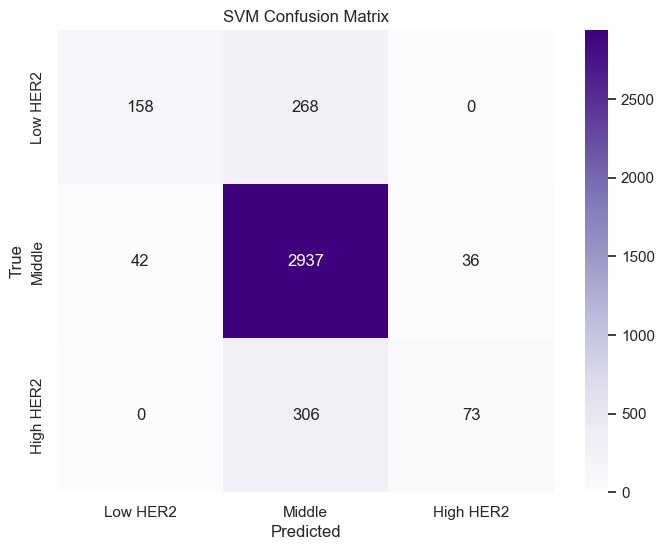

In [34]:
# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap="Purples", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
# Accuracy
accuracy_svm = svm_model.score(X_test, y_test)
print(f"Accuracy of the SVM model: {accuracy_svm:.4f}")

Accuracy of the SVM model: 0.8293
